In [1]:
try:
    import SEM_Image as SI
    
except ImportError:
    import sys
    # Python version 3.10.12 is the newest version supported
    !{sys.executable} -m pip install --user --upgrade matplotlib tifffile

Select the .tif file that you want to analyse.

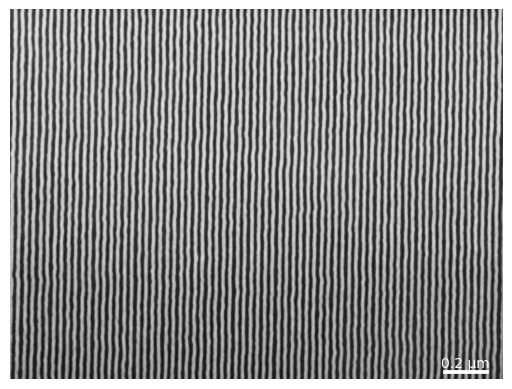

Angle of rotation: 0


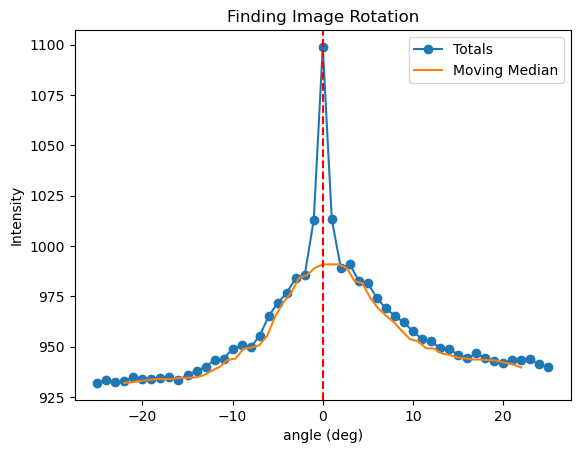

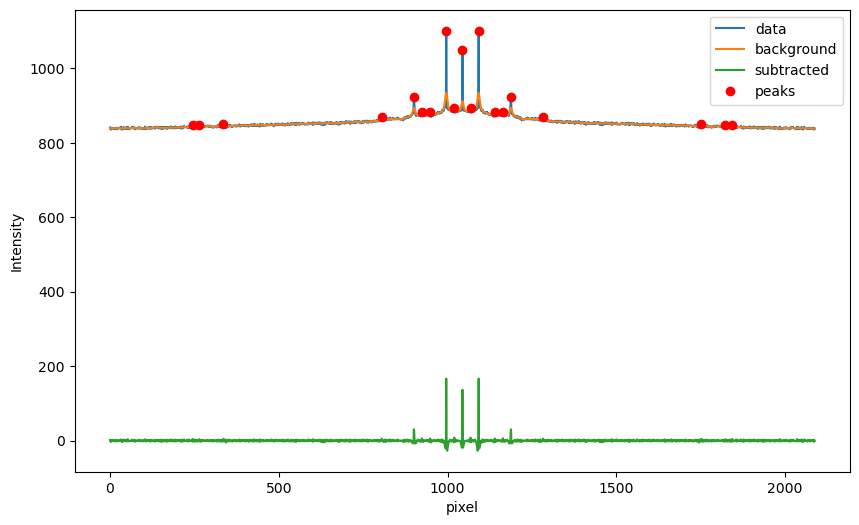

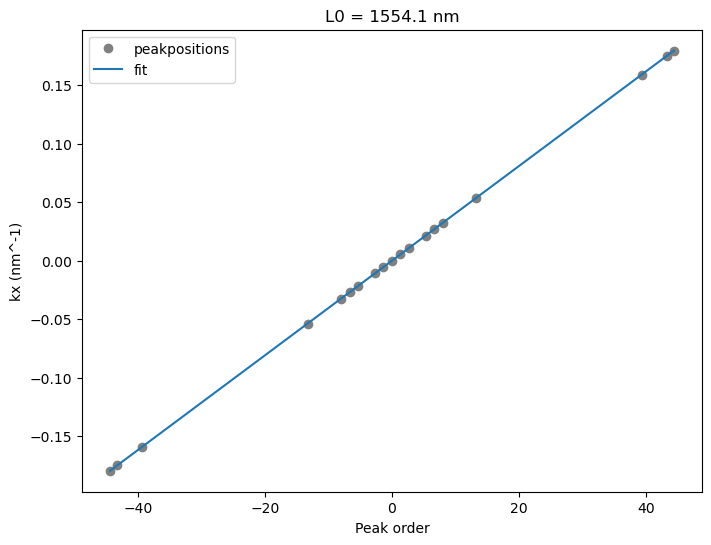

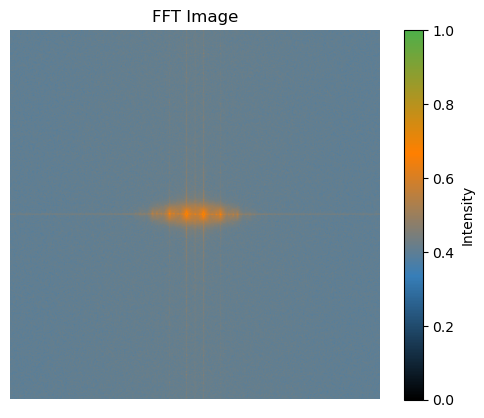

In [2]:
Image1 = SI.SEMImageDetails() # Initializes all the variables for the object
Image1.display_SEM_image(Image1.image, bar=True) # Displays the object image with scale bar
Image1() # This will run all the analysis
Image1.display_fft_image(Image1.image_FFT)